In [90]:
import os
import glob
import pandas as pd
os.chdir("C:\\Users\\jaeko")

In [92]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)

['team_expenditures.csv', 'team_wins.csv', 'team_interception.csv', 'team_tackles.csv', 'team_goals.csv', 'team_shots.csv', 'team_passes.csv', 'team_losses.csv', 'team_cleansheets.csv']


In [93]:
d = {'arsenal':100, 'chelsea':11}

l = [100, 11]

print('from dict: ' + str(d['chelsea']))
print('from list: ' + str(l[1]))

from dict: 11
from list: 11


In [94]:
dfs = {f:pd.read_csv(f) for f in all_filenames}

def clean_club_name(x):
    """ remove 'FC' and 'AFC' from Team names because sometimes
    a data set has FC, and other times it doesn't. We need all 
    the team names to be consistent accross data sets, and we 
    chose to remove these suffixes and prefixes from ALL team 
    names.
    """
    x = x.replace('AFC', '').replace('FC', '').strip()
    return(x)
for df in dfs.values():
    if 'Club' in df.columns:
      
        df.rename(columns={'Club':'TeamName'}, inplace=True)
    if 'Rank' in df.columns:
      
        del df['Rank']
    df['TeamName'] = df['TeamName'].apply(clean_club_name)  
    
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted; and add
    zeros for 'bn' or 'm' for billions or millions, respectively
    """
    if isinstance(x, str):
        x = x.replace('$', '').replace(',', '').replace('.','')
        x = x.replace('bn','0000000').replace('m','0000')
        return(x)
    return(x)
df = dfs['team_expenditures.csv']
df['Expenditure'] = df['Expenditure'].apply(clean_currency).astype('int')
df['Income'] = df['Income'].apply(clean_currency).astype('int')

In [95]:
combined = dfs['team_expenditures.csv']

for fn, df in dfs.items():
  
    if fn=='team_expenditures.csv':
        continue
    
    combined = pd.merge(combined, df, on='TeamName', how='left')



In [97]:
combined

,#,TeamName,Competition,Expenditure,Arrivals,Income,Departures,Wins,Interception,Tackles,Goals,Shots,Passes,Losses,Clean Sheets
0,1,Chelsea,Premier League,2380000000,623,1300000000,608,570.0,6645.0,10244.0,1813.0,8896.0,268724.0,231.0,425.0
1,2,Manchester City,Premier League,2300000000,611,692340000,597,407.0,7153.0,10157.0,1439.0,8355.0,276375.0,267.0,285.0
2,3,Manchester United,Premier League,2070000000,477,817920000,484,657.0,7193.0,10062.0,2025.0,8099.0,266316.0,174.0,449.0
3,4,Liverpool,Premier League,1780000000,507,1140000000,504,553.0,6700.0,11236.0,1834.0,8832.0,269870.0,247.0,405.0
4,5,Tottenham Hotspur,Premier League,1440000000,570,963320000,575,456.0,7609.0,10518.0,1587.0,8240.0,245955.0,343.0,298.0
5,6,Arsenal,Premier League,1350000000,454,821510000,454,571.0,8017.0,10324.0,1877.0,8085.0,278941.0,219.0,406.0
6,7,Everton,Premier League,1060000000,439,698730000,430,386.0,7080.0,9981.0,1388.0,6988.0,214070.0,375.0,327.0
7,8,Newcastle United,Premier League,1030000000,506,694830000,497,354.0,6323.0,8829.0,1273.0,5496.0,167851.0,350.0,248.0
8,9,Aston Villa,Premier League,872800000,509,428040000,511,323.0,6244.0,8520.0,1149.0,4878.0,147433.0,347.0,272.0
9,10,West Ham United,Premier League,867390000,620,586270000,606,296.0,6487.0,9358.0,1094.0,6132.0,180224.0,377.0,239.0


In [98]:
dfs['team_wins.csv']

,TeamName,Wins
0,Manchester United,657
1,Arsenal,571
2,Chelsea,570
3,Liverpool,553
4,Tottenham Hotspur,456
5,Manchester City,407
6,Everton,386
7,Newcastle United,354
8,Aston Villa,323
9,West Ham United,296


In [99]:
dfs.keys()  

dict_keys(['team_expenditures.csv', 'team_wins.csv', 'team_interception.csv', 'team_tackles.csv', 'team_goals.csv', 'team_shots.csv', 'team_passes.csv', 'team_losses.csv', 'team_cleansheets.csv'])

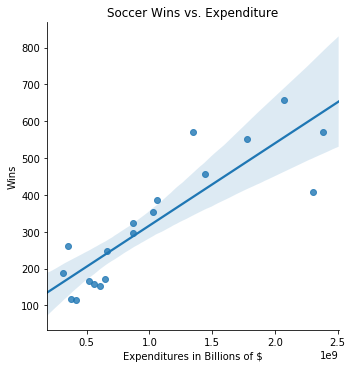

In [100]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = sns.lmplot(x='Expenditure', y='Wins', data=combined, fit_reg=True)
ax = plt.gca()
ax.set_title("Soccer Wins vs. Expenditure")
fig.set_axis_labels('Expenditures in Billions of $', 'Wins')

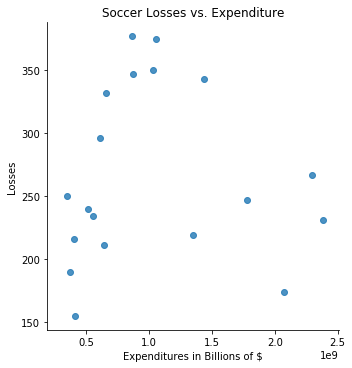

In [101]:
fig = sns.lmplot(x='Expenditure', y='Losses', data=combined, fit_reg=False)
ax = plt.gca()
ax.set_title("Soccer Losses vs. Expenditure")
fig.set_axis_labels('Expenditures in Billions of $', 'Losses')

In [102]:
data = combined.copy()
drop = ['#', 'TeamName', 'Competition']
for d in drop:
    del data[d]

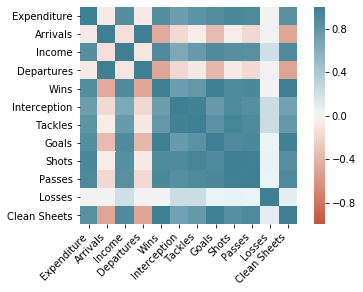

In [103]:
import matplotlib.pyplot as plt
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, 
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_ylim(len(data.columns), 0)
plt.savefig('C:\\Users\\jaeko/soccer_heat_map.png',
           dpi=1200)
plt.show()

In [106]:
import matplotlib.pyplot as plt
corr.style.background_gradient(cmap='coolwarm')

corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Expenditure,Arrivals,Income,Departures,Wins,Interception,Tackles,Goals,Shots,Passes,Losses,Clean Sheets
Expenditure,1,-0.074,0.87,-0.072,0.87,0.74,0.82,0.87,0.92,0.91,0.0072,0.85
Arrivals,-0.074,1,-0.14,0.99,-0.47,-0.16,-0.053,-0.37,-0.051,-0.18,0.027,-0.49
Income,0.87,-0.14,1,-0.11,0.89,0.65,0.77,0.9,0.86,0.85,0.21,0.89
Departures,-0.072,0.99,-0.11,1,-0.48,-0.18,-0.081,-0.38,-0.078,-0.17,0.01,-0.5
Wins,0.87,-0.47,0.89,-0.48,1,0.73,0.79,0.99,0.88,0.92,0.039,0.99
Interception,0.74,-0.16,0.65,-0.18,0.73,1,0.96,0.77,0.9,0.86,0.24,0.72
Tackles,0.82,-0.053,0.77,-0.081,0.79,0.96,1,0.84,0.95,0.89,0.24,0.79
Goals,0.87,-0.37,0.9,-0.38,0.99,0.77,0.84,1,0.89,0.93,0.053,0.98
Shots,0.92,-0.051,0.86,-0.078,0.88,0.9,0.95,0.89,1,0.98,0.066,0.86
Passes,0.91,-0.18,0.85,-0.17,0.92,0.86,0.89,0.93,0.98,1,0.059,0.9


In [107]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression

In [108]:
combined.columns

Index(['#', 'TeamName', 'Competition', 'Expenditure', 'Arrivals', 'Income',
       'Departures', 'Wins', 'Interception', 'Tackles', 'Goals', 'Shots',
       'Passes', 'Losses', 'Clean Sheets'],
      dtype='object')

In [109]:
df = combined.copy()

for n in ['#', 'TeamName', 'Competition', 'Arrivals', 'Income',
       'Departures', 'Interception', 'Tackles', 'Goals', 'Shots',
       'Passes', 'Losses', 'Clean Sheets']:
    del df[n]

df = df.dropna()
print(df)
total_expenditure_all_teams = df['Expenditure'].sum()
df['Expenditure'] = df['Expenditure']/total_expenditure_all_teams
df['Wins'] = df['Wins']/26
print(df)
expenditure = df.iloc[:, 0].values.reshape(-1, 1) 
expenditure = df['Expenditure'].values.reshape(-1, 1) 
wins = df['Wins'].values.reshape(-1,1)
linear_regressor = LinearRegression()  
X = expenditure; Y=wins
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

    Expenditure   Wins
0    2380000000  570.0
1    2300000000  407.0
2    2070000000  657.0
3    1780000000  553.0
4    1440000000  456.0
5    1350000000  571.0
6    1060000000  386.0
7    1030000000  354.0
8     872800000  323.0
9     867390000  296.0
10    660650000  247.0
11    646960000  172.0
12    610580000  153.0
13    559680000  157.0
14    515830000  165.0
16    413440000  116.0
19    375950000  118.0
20    350580000  262.0
22    313180000  189.0
    Expenditure       Wins
0      0.121447  21.923077
1      0.117365  15.653846
2      0.105628  25.269231
3      0.090830  21.269231
4      0.073480  17.538462
5      0.068888  21.961538
6      0.054090  14.846154
7      0.052559  13.615385
8      0.044537  12.423077
9      0.044261  11.384615
10     0.033712   9.500000
11     0.033013   6.615385
12     0.031157   5.884615
13     0.028559   6.038462
14     0.026322   6.346154
16     0.021097   4.461538
19     0.019184   4.538462
20     0.017889  10.076923
22     0.015981   7.269231


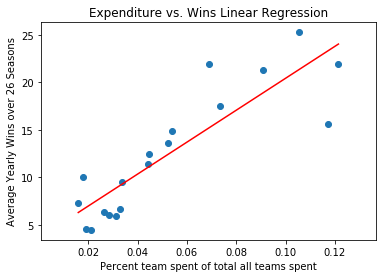

In [110]:
plt.scatter(X, Y)  
plt.plot(X, Y_pred, color='red')  
plt.title('Expenditure vs. Wins Linear Regression')
plt.xlabel('Percent team spent of total all teams spent')
plt.ylabel('Average Yearly Wins over 26 Seasons')
plt.savefig('/Users/jan/Learning/jupyter_python/soccer_lin_reg.png',
           dpi=600)
plt.show()

In [111]:
linear_regressor.coef_   

array([[168.3490058]])

In [112]:
linear_regressor.intercept_  

array([3.59296731])

In [119]:
s1718 = pd.read_csv('/Users/jan/Learning/jupyter_python/season17_18.csv')

In [120]:
s1718.columns

Index(['Unnamed: 0', 'TeamName', 'Competition', 'Expenditure', 'Arrivals',
       'Departures', 'Clean Sheets', 'Goals', 'Interception', 'Losses',
       'Passes', 'Shots', 'Tackles', 'Wins'],
      dtype='object')

In [121]:
type(s1718)

pandas.core.frame.DataFrame

In [122]:
for n in ['Unnamed: 0', 'TeamName', 'Competition', 'Arrivals',
       'Departures', 'Clean Sheets', 'Goals', 'Interception', 'Losses',
       'Passes', 'Shots', 'Tackles']:
    del s1718[n]

In [123]:
s1718.drop(s1718.index[20], inplace=True)

In [124]:
total_expenditure_all_teams = s1718['Expenditure'].sum()
s1718['Expenditure'] = s1718['Expenditure']/total_expenditure_all_teams

In [125]:
s1718

,Expenditure,Wins
0,0.119480,21.0
1,0.145623,32.0
2,0.090997,25.0
3,0.079752,21.0
4,0.055727,23.0
5,0.070108,19.0
6,0.093199,13.0
7,0.020318,12.0
8,0.026052,10.0
9,0.028095,7.0


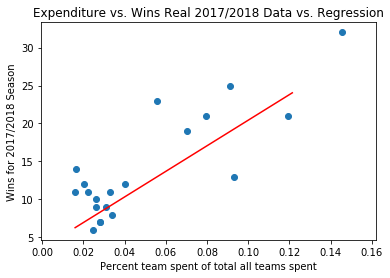

In [126]:
plt.scatter(s1718['Expenditure'], s1718['Wins'])
plt.plot(X, Y_pred, color='red')
plt.title('Expenditure vs. Wins Real 2017/2018 Data vs. Regression')
plt.xlabel('Percent team spent of total all teams spent')
plt.ylabel('Wins for 2017/2018 Season')
plt.savefig('C:\\Users\\jaeko',
           dpi=600)
plt.show()